---
title: "Data Science Job Postings 2024 (Part I)"
description: >
    <span class="description">A hands-on walkthrough using a LinkedIn-based dataset to clean and explore job titles, companies, and locations.</span>
date: 2025-05-20
categories: [Data Science, EDA, Job Market]
image: 317750_linkedin_icon.png
format:
  html:
    toc: true
    toc-depth: 2
    code-copy: true
    code-overflow: wrap
    css: styles.css
---


# Data Science Job Postings 2024 (Part I)
## Data Preparation & Explanatory Data Analysis
A hands-on walkthrough using a LinkedIn-based dataset to clean and explore job titles, companies, and locations.

---

## 📥 How to Get the Dataset

This notebook uses the **Data Science Job Postings & Skills (2024)** dataset, authored by asaniczka, which contains real job listings scraped from LinkedIn. You can download it in two ways:

### Option 1: From Kaggle
- Visit the dataset page here:  
  👉 [Kaggle - Data Science Job Postings and Skills](https://www.kaggle.com/datasets/asaniczka/data-science-job-postings-and-skills)

### Option 2: Use Python via `kagglehub`
If you're using Python, follow my step-by-step guide to downloading Kaggle datasets using the new `kagglehub` library:  
👉 [How to Download Datasets from Kaggle Using kagglehub](https://flazoukie.github.io/data-blog/posts/kagglehub-download.html)

---

Once you’ve downloaded the dataset, make sure the following CSV files are in your working directory:

- `job_postings.csv`
- `job_skills.csv`
- `job_summary.csv`

---

## 🗂️ Dataset Overview

This notebook is part of a multi-post series analyzing a dataset of real **Data Science job postings** collected from LinkedIn in 2024.

In this first part, we focus on exploring the structure of the `job_posting.csv` file and performing basic cleaning and exploratory analysis.

**Columns overview:**

- `job_link`: direct link to the job posting
- `job_title`: job title
- `company`: company name
- `job_location`: job location (city/state/country)
- `first_seen`: when the job was first scraped
- Additional metadata: processing status flags

Our goal today is to clean the data and explore job titles, companies, and job locations.

Load the necessary libraries and (optional) set the preferred configurations for your data visualizations.

In [20]:
# load the necessary libraries and configure the settings for data visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# viz. configurations
sns.set(style="whitegrid") # improves plots readability
plt.rcParams["figure.figsize"] = (10, 5) # this configuration is best suitable for blog posts like this

Load your data:

In [21]:
df = pd.read_csv("job_postings.csv")
df.head(3)

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             12217 non-null  object
 1   last_processed_time  12217 non-null  object
 2   last_status          12217 non-null  object
 3   got_summary          12217 non-null  object
 4   got_ner              12217 non-null  object
 5   is_being_worked      12217 non-null  object
 6   job_title            12217 non-null  object
 7   company              12217 non-null  object
 8   job_location         12216 non-null  object
 9   first_seen           12217 non-null  object
 10  search_city          12217 non-null  object
 11  search_country       12217 non-null  object
 12  search_position      12217 non-null  object
 13  job_level            12217 non-null  object
 14  job_type             12217 non-null  object
dtypes: object(15)
memory usage: 1.4+ MB


## 🧹 Step 1: Drop Irrelevant Columns

As we will not use all the columns, we will now drop the unnecessary ones, reducing thus the volume of the dataset:

In [23]:
# drop unnecessary columns
df_cleaned = df.drop(columns=[
    'job_link', 'last_processed_time', 'last_status', 
    'got_summary', 'got_ner', 'is_being_worked'
])

## 🚿 Step 2: Clean Duplicates and Missing Values

Let's now clean our dataset from duplicate values and look for missing values.

In [25]:
# drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [28]:
# count missing values
df_cleaned.isnull().sum()

job_title          0
company            0
job_location       0
first_seen         0
search_city        0
search_country     0
search_position    0
job_level          0
job_type           0
dtype: int64

We found one missing value in job_location. This time we will just remove the missing row with teh missing value. 
In other contexts, it makes sense to deal with misisng values in other ways. You can read about methods to deal with missing values here: https://www.geeksforgeeks.org/ml-handling-missing-values/.

In [27]:
# drop missing values
df_cleaned = df_cleaned.dropna()

## 📊 Step 3: Explore the Data

We will now have a deeper look at teh dataset, in particular focusing on:

* job titles
* companies
* location

Let's count the number of entries for each job title, company and location:

In [31]:
# count entriep per job title, diplay the first 10
df_cleaned['job_title'].value_counts().head(10)

job_title
Senior Data Engineer                         273
Senior Data Analyst                          157
Data Engineer                                146
Senior MLOps Engineer                        138
Data Analyst                                 131
Data Scientist                               127
Senior Data Scientist                        117
Lead Data Engineer                           116
Data Architect                               106
Staff Machine Learning Engineer, Series A     99
Name: count, dtype: int64

In [32]:
# count the entries for each company
df_cleaned['company'].value_counts().head(10)

company
Jobs for Humanity            669
Recruiting from Scratch      387
Dice                         179
Agoda                        172
ClearanceJobs                159
ClickJobs.io                 152
Capital One                   80
Energy Jobline                70
Deloitte                      67
Amazon Web Services (AWS)     64
Name: count, dtype: int64

In [33]:
# count teh entries for each location
df_cleaned['job_location'].value_counts().head(10)

job_location
New York, NY                       273
Chicago, IL                        232
London, England, United Kingdom    230
San Francisco, CA                  196
Washington, DC                     171
Austin, TX                         165
Seattle, WA                        160
Dallas, TX                         154
Boston, MA                         150
Atlanta, GA                        144
Name: count, dtype: int64

We can now visualize the results:

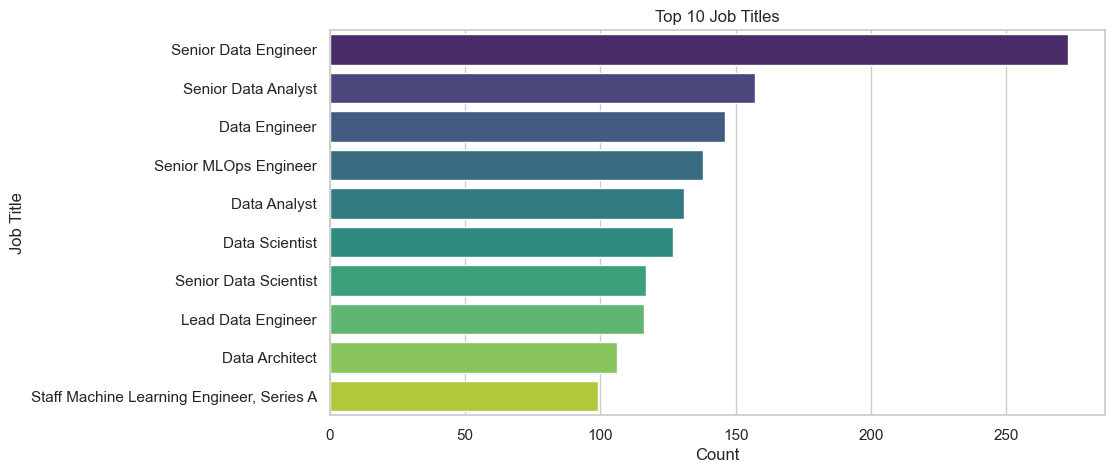

In [39]:
# viz. job titles
top_titles = df_cleaned['job_title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index, hue=top_titles.index, palette="viridis", legend=False)
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

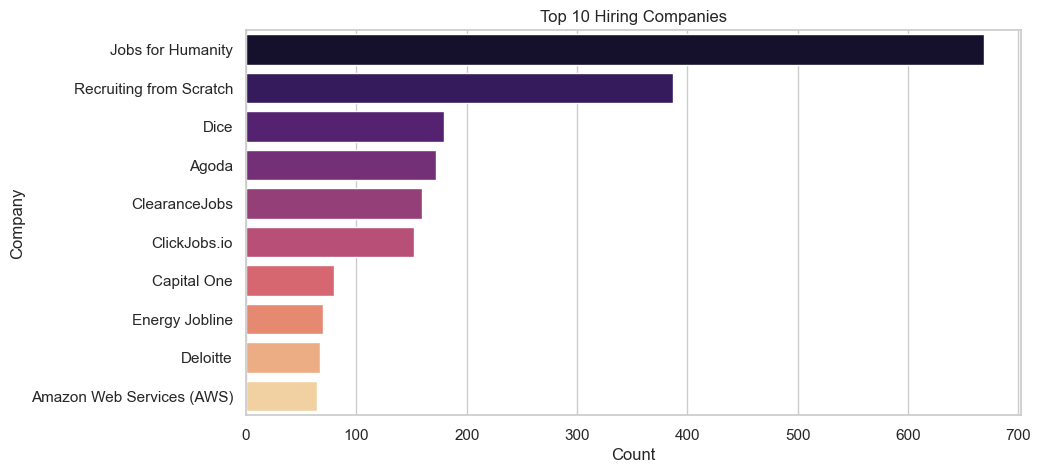

In [42]:
# viz. top 10 hiring companies
top_companies = df_cleaned['company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="magma", legend=False)
plt.title("Top 10 Hiring Companies")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()

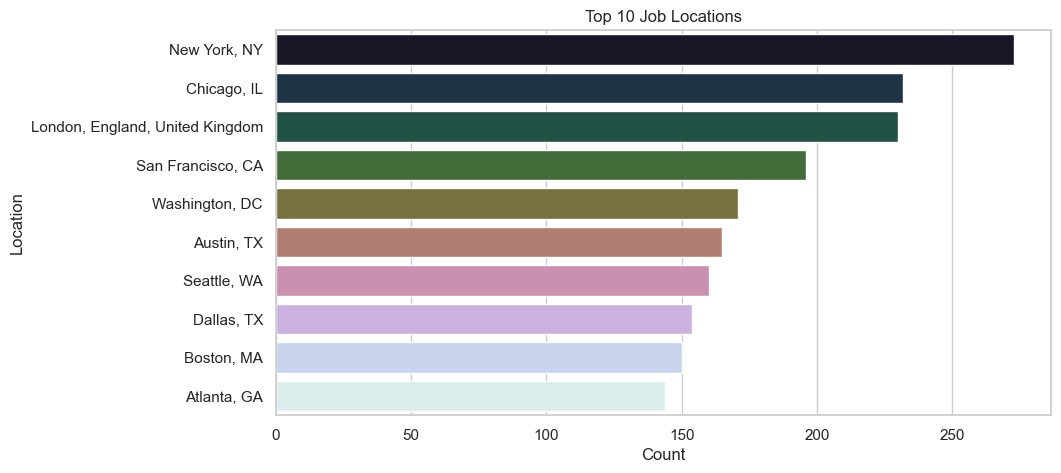

In [44]:
# top 10 job locations
top_locations = df_cleaned['job_location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="cubehelix", hue=top_locations.index, legend=False)
plt.title("Top 10 Job Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

## Main Takeouts

We have seen that:

* The Top 3 **Job Titles** in data Science are: Senior Data Engineer, Senrios Data Analyst, and Data Engineer.
* The top 3 **Companies** are: Jobs For Humanity, Recruiting from Scratch, and Dice.
* The top 3 **Locations** are: New York, Chicago, and London.

This analysis has its clear limitation, and may be highly biased by the language of the job search, i.e., English. So, be carefull when drawing conclusions from these data!



## 🧭 Next Steps

In the next post, we’ll explore the `job_skills.csv` file to identify:

- The most frequently required skills
- Skill trends by job title or level
- Keywords and technologies in demand for Data Scientists

📌 Stay tuned!
